In [1]:
import ISLP
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

data = ISLP.load_data("Smarket")
X, y = data.drop("Direction", axis=1), data["Direction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


Här blev det data leakage, vilket var det som gjorde att det blev 100% korrelering. Det skedde genom att Today och Direction är 100% korrelerade. Ett exempel på att det gäller att förstå datan. Felet uppstod genom att Raphael antog att Direction handlade om morgondagen istället för dagen.

              precision    recall  f1-score   support

        Down       0.99      0.97      0.98       181
          Up       0.97      0.99      0.98       194

    accuracy                           0.98       375
   macro avg       0.98      0.98      0.98       375
weighted avg       0.98      0.98      0.98       375



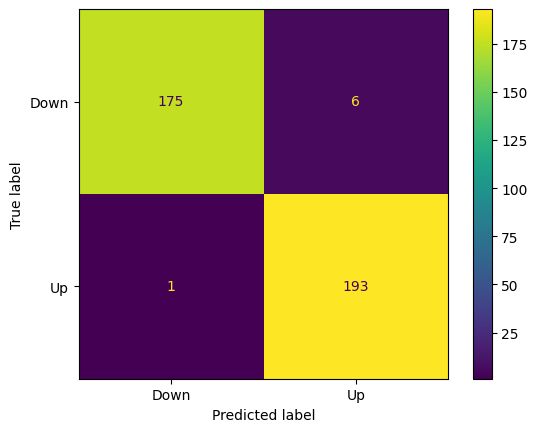

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

Detta är för index 2001-2005. Om de går upp eller ner. Det här är en jättebra NB-modell, med 96% rätt. Behöver ha några miljoner för att det ska ge pengar. 

När aktierna går ner kan man gå kort. Då kan man tjäna pengar.

              precision    recall  f1-score   support

        Down       0.87      0.86      0.86       181
          Up       0.87      0.88      0.87       194

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



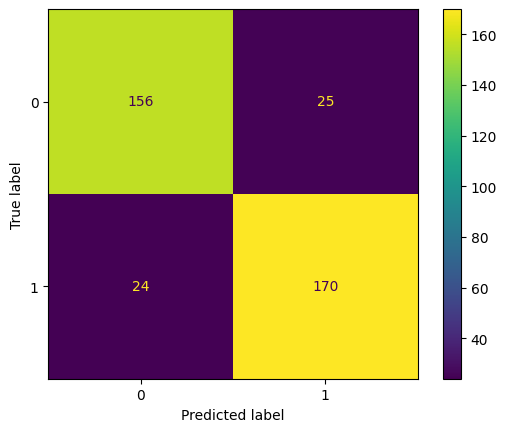

In [16]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
model = ComplementNB()

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        Down       1.00      0.04      0.08       181
          Up       0.53      1.00      0.69       194

    accuracy                           0.54       375
   macro avg       0.76      0.52      0.39       375
weighted avg       0.76      0.54      0.40       375



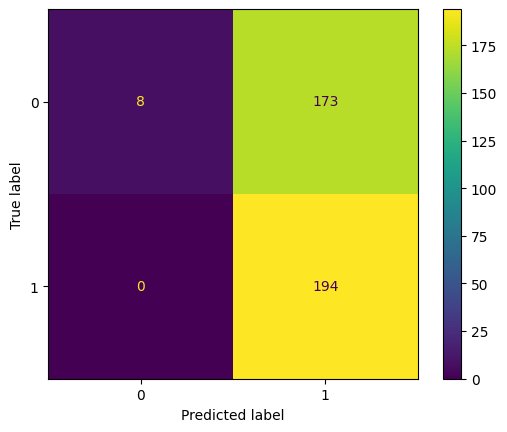

In [18]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Inte lämpligt som multinomiellt alltså. 

              precision    recall  f1-score   support

        Down       1.00      1.00      1.00       181
          Up       1.00      1.00      1.00       194

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



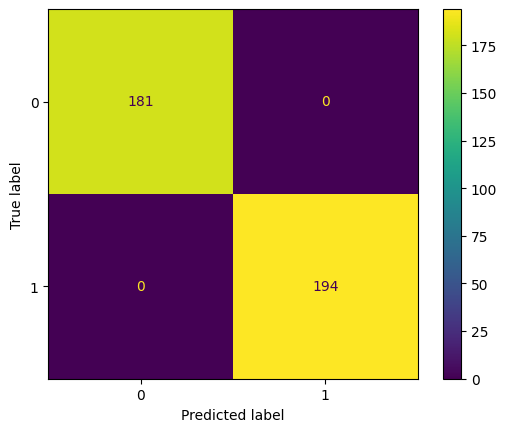

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler
model = BernoulliNB()

# scaler = MinMaxScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

Mätningar per år. Perfekt klassifikator för SMP 500. Bernoulli. Geometriskt distribuerad/fördelad. Det som händer en dag är helt bestämt av det som händer dagen innan. Markov nånting nämnde han. Hur har de räknat ut laggen?
Här har vi nog listat ut hur de genererat datasettet snarare än något annat.

Kan man få tag i nutida data?

Att NB funkar så bra trots att den struntar i eventuella korrelationer beror på centrala gränsvärdessatsen, för stora n är alla normalfördelade.

NB är känt bra på text. Också bra när man inte vet hur man ska göra, för de funkar alltid till en viss grad.